In [7]:
import numpy as np
from scipy import interpolate, constants, integrate
import matplotlib.pyplot as plt
from numba import njit

np.random.seed(379190741)

In [8]:
def pdf(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
    
def cdf(x):
    return integrate.quad(pdf, -np.inf, x)[0]

In [9]:
x = np.linspace(-6, 6, num=10_000)
y = np.array([cdf(i) for i in x])

In [10]:
cdf_inverse = interpolate.interp1d(y, x)

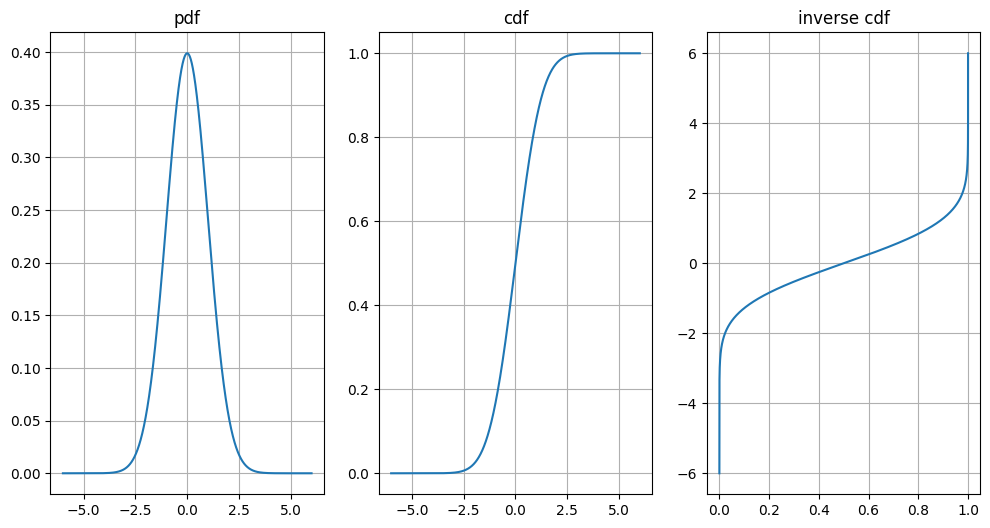

In [11]:

fig, ax = plt.subplots(1, 3, figsize=(12,6))

ax[0].plot(x, pdf(x))
ax[0].grid()
ax[0].set_title("pdf")

ax[1].plot(x, y)
ax[1].grid()
ax[1].set_title("cdf")

ax[2].plot(y, cdf_inverse(y))
ax[2].grid()
ax[2].set_title("inverse cdf")

plt.show()

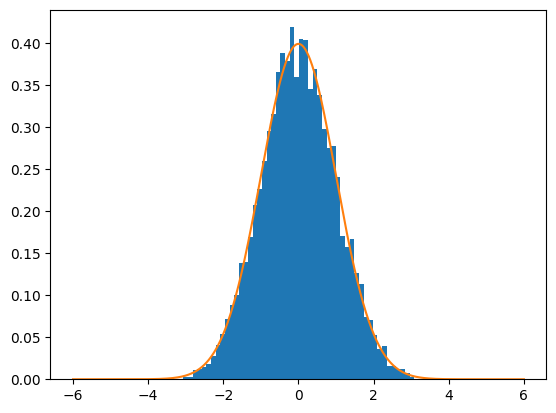

In [12]:
u = np.random.uniform(0.001, 0.999, 10_000)
sample = cdf_inverse(u)

fig, ax = plt.subplots()
ax.hist(sample, bins="auto", density=True)
ax.plot(x, pdf(x))

plt.show()